In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy.interpolate import interp1d
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import pandas as pd
import h5py


In [2]:
f = h5py.File('/Users/jon.heffer/COTA/coffee_tonge_lip_pit.hdf5', 'r')
list(f.keys())

['Channel 1', 'Channel 2', 'Channel 5', 'Channel 8']

In [3]:
Left = np.array(f['Channel 1'])
Centre = np.array(f['Channel 2'])
V_sync = np.array(f['Channel 5'])/1000
Right = np.array(f['Channel 8'])
length=Left.size
print(length)
Time=np.linspace(0,(length-1)*0.1,length)
Time[0:3]

19513


array([0. , 0.1, 0.2])

<IPython.core.display.Javascript object>


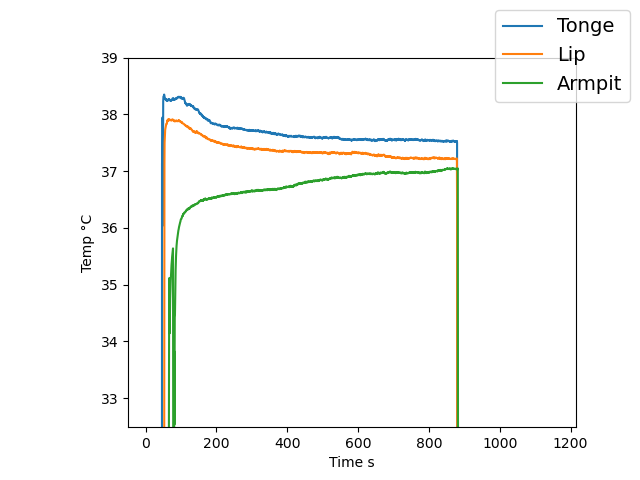

In [4]:
%matplotlib notebook
fig, ax = plt.subplots()
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
l1=ax.plot(Time,Left,label='Tonge')
l2=ax.plot(Time,Centre,label='Lip')
l3=ax.plot(Time,Right,label='Armpit')
ax.set_ylabel('Temp \u00B0C')
ax.set_xlabel('Time s')
#l4=ax.plot(Time,V_sync,label='Sync')
fig.legend()
pos = ax.get_position()
pos.x0 = 0.2       # for example 0.2, choose your value
ax.set_position(pos)
#handles=[l1,l2,l3, l4])
fig.show()
fig.savefig('hot.png')